In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import cv2

print(os.listdir("../input/numta"))
print(os.listdir("../working/"))

['training-a', 'training-e', 'testing-a', 'testing-e', 'training-a.csv', 'testing-c', 'testing-f', 'testing-augc', 'training-e.csv', 'training-b', 'testing-b', 'training-d.csv', 'training-b.csv', 'testing-all-corrected', 'training-d', 'testing-auga', 'training-c', 'training-c.csv', 'testing-d']
['__notebook__.ipynb']


In [2]:
!mkdir train
!mkdir test
!mkdir val

In [3]:
from shutil import copyfile

print('Preparing Test Folder...') 
datasets = ['c', 'augc']
for dataset in datasets:
    src_test_file_paths = glob.glob('../input/numta/testing-' + dataset + '/*.*')
    dst_test_folder = 'test/test/'
    if not os.path.exists(dst_test_folder):
        os.makedirs(dst_test_folder)
    n = len(src_test_file_paths)
    i = 0
    for src_test_file_path in src_test_file_paths:
        filename = os.path.basename(src_test_file_path)
        dst_test_file_path = dst_test_folder + filename

        copyfile(src_test_file_path, dst_test_file_path)
        i += 1
        print('\rProcessed {}/{}'.format(i, n), end='')
    print()

Preparing Test Folder...
Processed 4381/4381
Processed 2106/2106


In [4]:
print('Preparing Train Folder...')
datasets = ['c'] 
for dataset in datasets:
    csv_file = '../input/numta/training-'+ dataset +'.csv'
    src_folder = '../input/numta/training-' + dataset + '/'
    dst_folder = 'train/'
    
    label = pd.read_csv(csv_file)
    n, m = label.shape
    
    for index, row in label.iterrows():
        src_file = src_folder + row.filename
        dst_file = dst_folder + str(row.digit) + '/' + row.filename
        if not os.path.exists(dst_folder + str(row.digit) + '/'):
            os.makedirs(dst_folder + str(row.digit) + '/')
#         image = cv2.imread(src_file)
#         image = cv2.resize(image, (img_rows, img_cols))
#         cv2.imwrite(dst_file, image)
        copyfile(src_file, dst_file)
        print('\rProcessed {}/{}'.format(index + 1, n), end='')
    print()

Preparing Train Folder...
Processed 24298/24298


In [5]:
!ls train

0  1  2  3  4  5  6  7	8  9


In [6]:
print(os.listdir('../working/'))

['train', 'test', '__notebook__.ipynb', 'val']


In [7]:
import os
import shutil
import random

In [8]:
data_dirs = [str(i) for i in range (10)]

In [9]:
TRAIN_PATH = '../working/train/'
VAL_PATH = '../working/val/'
TEST_PATH = '../working/test/'

In [10]:
for directory in data_dirs:
    files = [file for file in os.listdir(TRAIN_PATH+'/'+directory) if os.path.isfile(os.path.join(TRAIN_PATH+'/'+directory, file))]

    output_dir = VAL_PATH + directory
    random_amount = int(.3*len(files))
    
#     print(random_amount, len(files), directory)
    
    for x in range(random_amount):
        file = files[x]
        if not os.path.exists(os.path.join(VAL_PATH+directory)):
            os.makedirs(output_dir)
#             print(TRAIN_PATH + directory, file)
        shutil.move(os.path.join(TRAIN_PATH + directory, file), output_dir+'/'+file)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation,Dropout,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
        'train',
        color_mode = 'grayscale',
        target_size=(100, 100),
        batch_size=64,
        class_mode='categorical')

Found 17013 images belonging to 10 classes.


In [15]:
val_generator = val_datagen.flow_from_directory(
        'val',
        color_mode = 'grayscale',
        target_size=(100, 100),
        batch_size=64,
        class_mode='categorical')

Found 7285 images belonging to 10 classes.


In [16]:
model = Sequential()
model.add(Conv2D(8, (5, 5), input_shape=(100,100,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [17]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

In [18]:
history = model.fit_generator( train_generator, epochs=25, steps_per_epoch=len(train_generator), 
                              validation_data=val_generator, validation_steps=len(train_generator), verbose=1)

Epoch 1/25
266/266 [==============================] - 63s 237ms/step - loss: 1.5652 - accuracy: 0.4630 - val_loss: 0.7769 - val_accuracy: 0.7433
Epoch 2/25
266/266 [==============================] - 58s 218ms/step - loss: 0.6517 - accuracy: 0.7880
Epoch 3/25
266/266 [==============================] - 54s 204ms/step - loss: 0.4783 - accuracy: 0.8441
Epoch 4/25
266/266 [==============================] - 55s 206ms/step - loss: 0.3725 - accuracy: 0.8789
Epoch 5/25
266/266 [==============================] - 53s 200ms/step - loss: 0.3215 - accuracy: 0.8918
Epoch 6/25
266/266 [==============================] - 52s 196ms/step - loss: 0.2705 - accuracy: 0.9128
Epoch 7/25
266/266 [==============================] - 53s 200ms/step - loss: 0.2259 - accuracy: 0.9255
Epoch 8/25
266/266 [==============================] - 53s 198ms/step - loss: 0.1964 - accuracy: 0.9368
Epoch 9/25
266/266 [==============================] - 53s 199ms/step - loss: 0.1798 - accuracy: 0.9386
Epoch 10/25
266/266 [==========

In [19]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'test',
        color_mode='grayscale',
        target_size=(100, 100),
        batch_size=64,
        class_mode=None, shuffle=False)

Found 6487 images belonging to 1 classes.


In [20]:
def predict(test_generator, model):
    pred_probs = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)
    pred_label = []
    for i in range(len(pred_probs)):
        label = np.argmax(pred_probs[i])
        pred_label.append(label)
    pred_key = os.listdir('test/test/')
    pred_key.sort()
    pred_df = pd.DataFrame({'key': pred_key, 'label': pred_label})
    return pred_df

In [21]:
simple_pred_df = predict(test_generator, model)

102/102 [==============================] - 8s 75ms/step


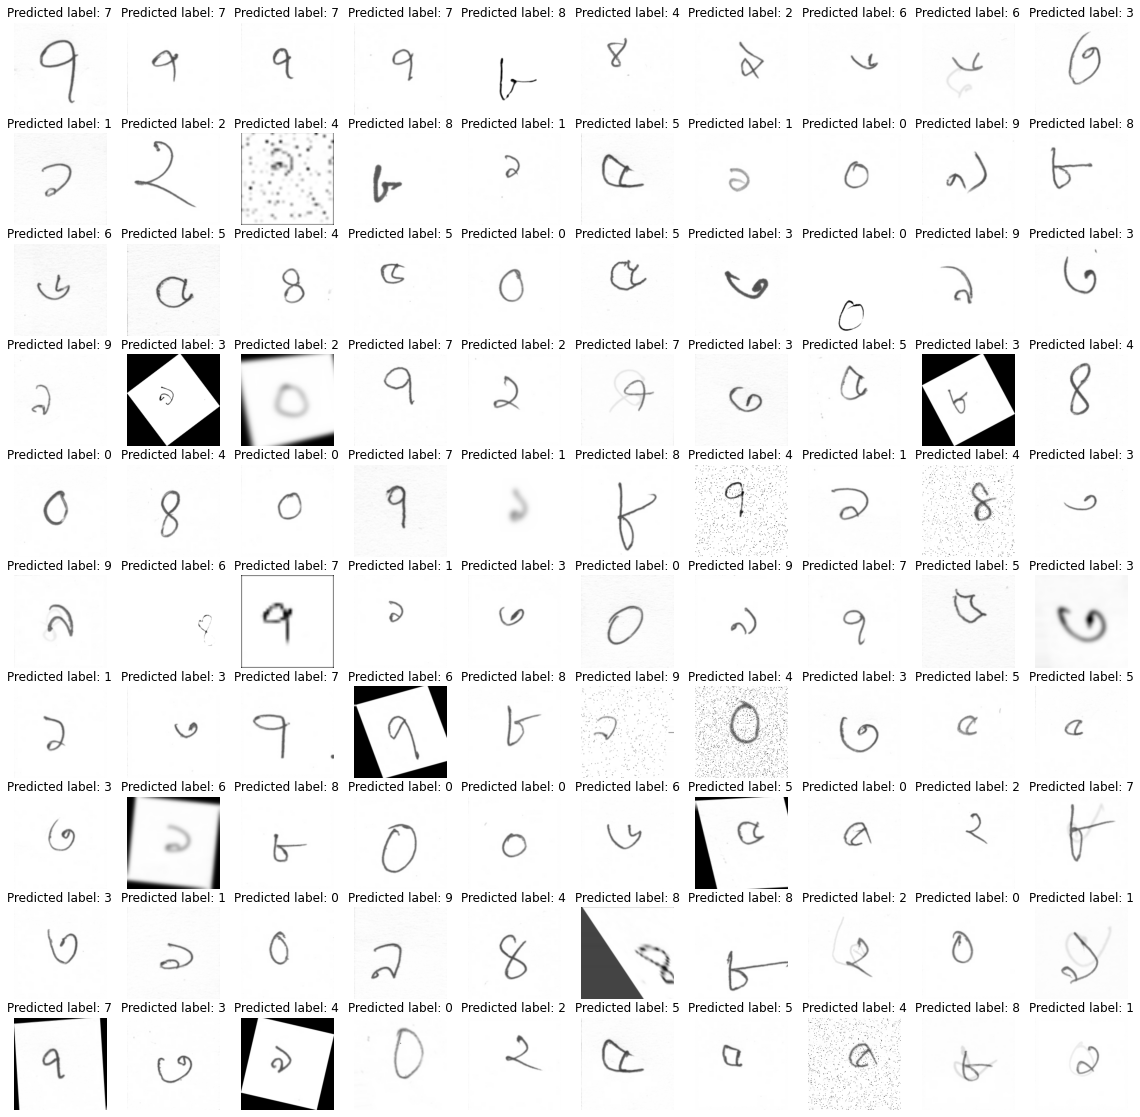

In [22]:
n, m = simple_pred_df.shape
image_per_row = 10
image_per_col = 10
N = image_per_row * image_per_col
random_index = np.random.randint(0, n, (N))
fig = plt.figure(figsize=(2 * image_per_col, 2 * image_per_row))
for i in range(N):
    idx = random_index[i]
    simple_result = simple_pred_df.iloc[idx]
#     augmented_result = augmented_pred_df.iloc[idx]
    image_file = 'test/test/' + simple_result['key']
    image = cv2.imread(image_file)
    plt.subplot(image_per_row, image_per_col, i + 1)
    plt.axis('off')
    plt.imshow(image)
    plt.title('Predicted label: ' + str(simple_result['label']))
plt.show()